Classification Accuracies:
Degree     Train Accuracy  Train Accuracy2 Validation Accuracy Validation Accuracy2 Test Accuracy   Test Accuracy2 
2          33.14           0.33                32.35           0.32            35.83               35.83          


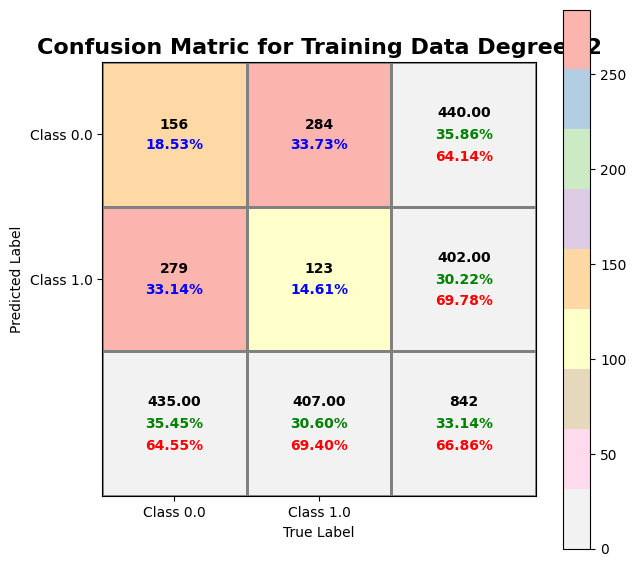

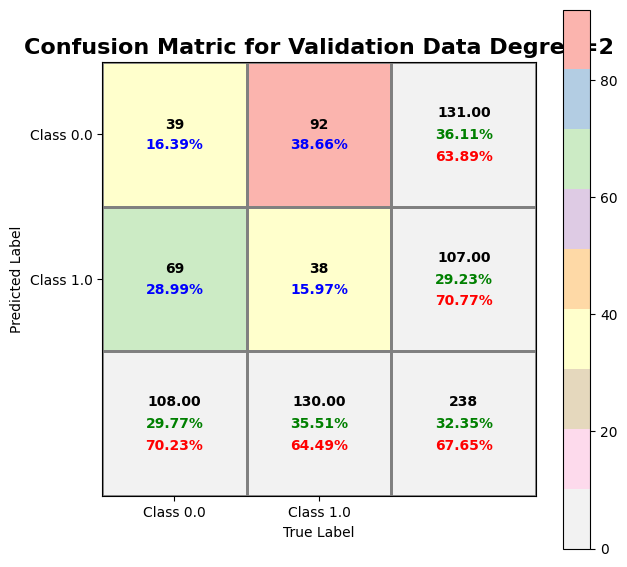

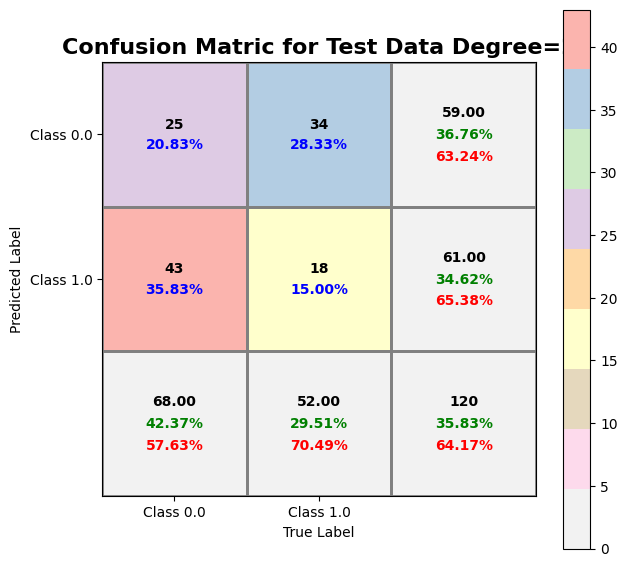

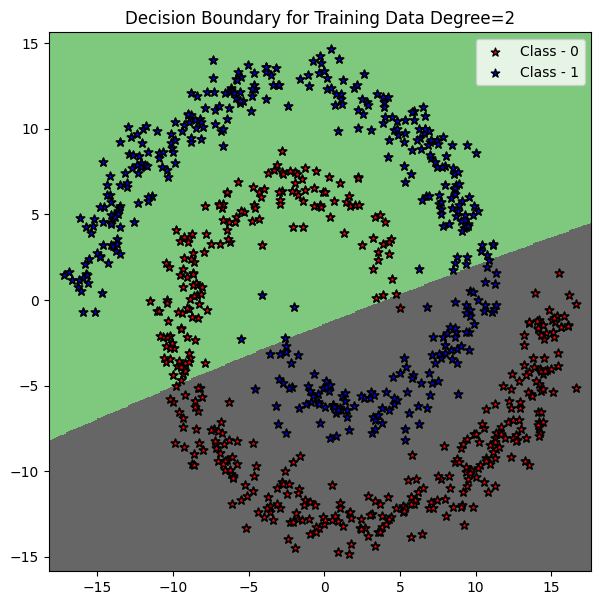

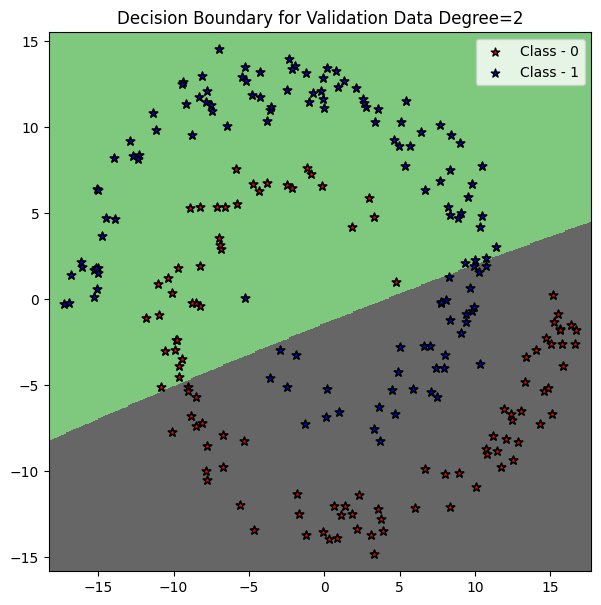

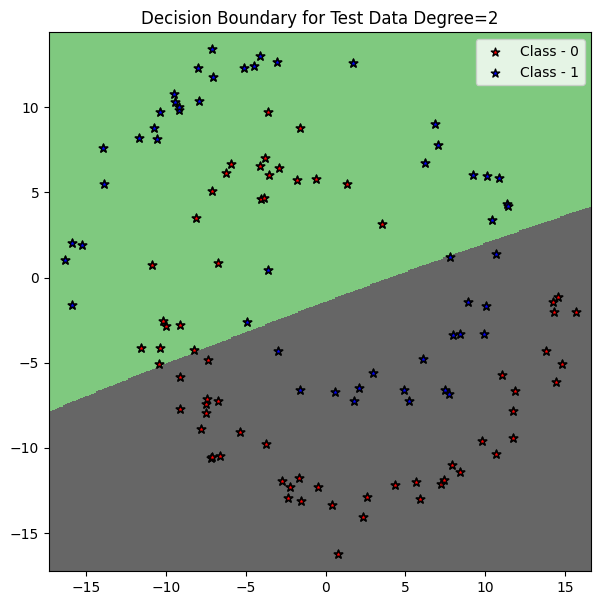

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

def build_and_train_model(n_components, x):
    # Train the SVM model
    model = GaussianMixture(n_components=n_components, covariance_type='full', init_params='random_from_data', random_state=42)

    model.fit(x)

    return model

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)*100

    accuracy2 = accuracy_score(y, y_pred)

    return accuracy, accuracy2, y_pred

def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    cm = cm.T
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title, fontsize=16, weight='bold')
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    plt.show()

def plot_decision_boundary(x, y, model, title):
    N = 500
    # Create a meshgrid of points covering the feature space
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x1_range = np.linspace(x1_min, x1_max, N)
    x2_range = np.linspace(x2_min, x2_max, N)
    xx1, xx2 = np.meshgrid(x1_range, x2_range)
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot decision boundaries
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.pcolormesh(xx1, xx2, Z, cmap='Accent')
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40)
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(title)
    plt.legend()
    plt.show()

def read_dataset_2(current_directory, folder_number):
    # classification_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_2_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Classification/Dataset 2/"
        + folder_number
        + "/"
    )

    classification_dataset_2_Train = (
        classification_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_2_Validation = (
        classification_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_2_Test = (
        classification_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y

def apply_GMM(train_x, train_y, val_x, val_y, test_x, test_y):

    models = {}
    results = {}
    n_components_list = [len(np.unique(train_y))]

    for n_components in n_components_list:
        model = build_and_train_model(n_components, train_x)
        models[n_components] = model

        # Evaluate the model on training data
        train_accuracy, train_accuracy2, train_y_pred = evaluate_model(model, train_x, train_y)
        
        # Evaluate the model on validation data
        val_accuracy, val_accuracy2, val_y_pred = evaluate_model(model, val_x, val_y)

        # Evaluate the model on test data
        test_accuracy, test_accuracy2, test_y_pred = evaluate_model(model, test_x, test_y)

        # Store results
        results[n_components] = {
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy,
            'train_accuracy2': train_accuracy2,
            'val_accuracy2': val_accuracy2,
            'test_accuracy2': test_accuracy2,
            'train_y_pred': train_y_pred,
            'val_y_pred': val_y_pred,
            'test_y_pred': test_y_pred
        }

    # Print the table of classification accuracies
    print("Classification Accuracies:")
    print("{:<10} {:<15} {:<15} {:<15} {:<15} {:<15} {:<15}".format("Degree", "Train Accuracy", "Train Accuracy2", "Validation Accuracy", "Validation Accuracy2", "Test Accuracy", "Test Accuracy2"))
    for degree, result in results.items():
        print("{:<10} {:<15.2f} {:<19.2f} {:<15.2f} {:<15.2f} {:<19.2f} {:<15.2f}".format(degree, result['train_accuracy'], result['train_accuracy2'], result['val_accuracy'], result['val_accuracy2'], result['test_accuracy'], result['test_accuracy']))


    # Plot confusion matrices
    for n_components in n_components_list:
        result = results[n_components]
        plot_confusion_matrix(train_y, result['train_y_pred'], result['train_accuracy'], title=f"Confusion Matric for Training Data Degree={n_components}")
    for n_components in n_components_list:
        result = results[n_components]
        plot_confusion_matrix(val_y, result['val_y_pred'], result['val_accuracy'], title=f"Confusion Matric for Validation Data Degree={n_components}")
    for n_components in n_components_list:
        result = results[n_components]
        plot_confusion_matrix(test_y, result['test_y_pred'], result['test_accuracy'], title=f"Confusion Matric for Test Data Degree={n_components}")

    # Plot decision boundary
    for n_components in n_components_list:
        model = models[n_components]
        plot_decision_boundary(train_x, train_y, model, title=f'Decision Boundary for Training Data Degree={n_components}')
    for n_components in n_components_list:
        model = models[n_components]
        plot_decision_boundary(val_x, val_y, model, title=f'Decision Boundary for Validation Data Degree={n_components}')
    for n_components in n_components_list:
        model = models[n_components]
        plot_decision_boundary(test_x, test_y, model, title=f'Decision Boundary for Test Data Degree={n_components}')


def main():
    folder_number = "9"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
        current_directory, folder_number
    )
    apply_GMM(train_x, train_y, val_x, val_y, test_x, test_y)

    

if __name__ == "__main__":
    main()


Classification Accuracies:
Num Components Train Accuracy  Validation Accuracy Test Accuracy  
2          83.25           87.82               80.83          
[[-24.0169193  -23.92982139 -23.84265675 ... -13.59325188 -13.64515735
  -13.69735652]
 [-23.98418676 -23.89757455 -23.81087385 ... -13.56990431 -13.62180978
  -13.67400895]
 [-23.95091217 -23.86481318 -23.77860319 ... -13.54663814 -13.5985436
  -13.65074277]
 ...
 [ -9.32558227  -9.29186785  -9.25847526 ... -12.0211117  -12.07301717
  -12.12521634]
 [ -9.35801975  -9.32430533  -9.29091274 ... -12.03821414 -12.0901196
  -12.14231877]
 [ -9.39072345  -9.35700903  -9.32361643 ... -12.05539796 -12.10730343
  -12.1595026 ]]


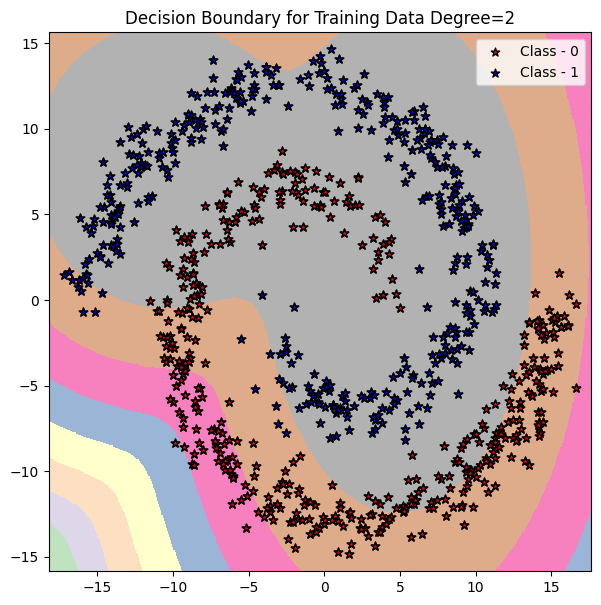

[[-24.08273013 -23.99554245 -23.90826615 ... -13.63381518 -13.6861794
  -13.73883944]
 [-24.04950909 -23.96283502 -23.8760497  ... -13.61057806 -13.66294227
  -13.71560231]
 [-24.01571566 -23.92958347 -23.84331671 ... -13.58742173 -13.63978594
  -13.69244598]
 ...
 [ -9.30648292  -9.27236577  -9.23857277 ... -12.04300578 -12.09536999
  -12.14803003]
 [ -9.33839779  -9.30428064  -9.27048764 ... -12.05992205 -12.11228626
  -12.1649463 ]
 [ -9.37057693  -9.33645977  -9.30266677 ... -12.0769191  -12.12928332
  -12.18194336]]


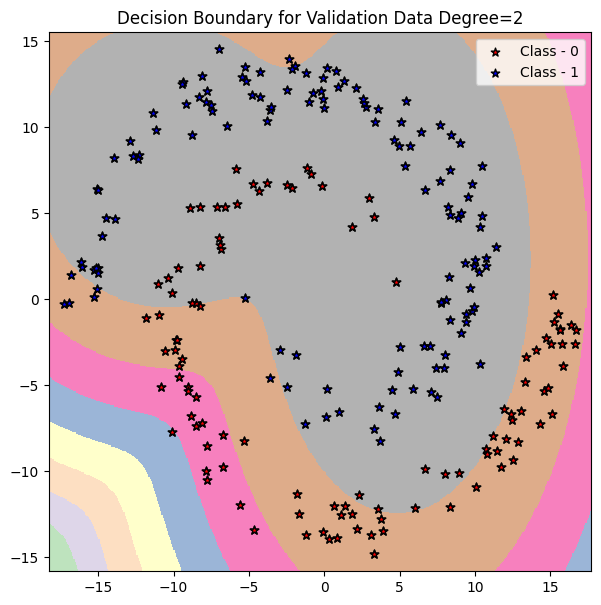

[[-23.56933586 -23.48410011 -23.39909409 ... -13.4458674  -13.49120738
  -13.53681134]
 [-23.5430867  -23.45790303 -23.37294625 ... -13.42055999 -13.46589996
  -13.51150392]
 [-23.51684375 -23.43171631 -23.34681271 ... -13.39533489 -13.44067487
  -13.48627883]
 ...
 [ -8.3650636   -8.33673842  -8.3087025  ... -11.01462391 -11.05996388
  -11.10556785]
 [ -8.39247226  -8.36414708  -8.33611115 ... -11.03022997 -11.07556995
  -11.12117391]
 [ -8.42015018  -8.391825    -8.36378907 ... -11.04591835 -11.09125833
  -11.13686229]]


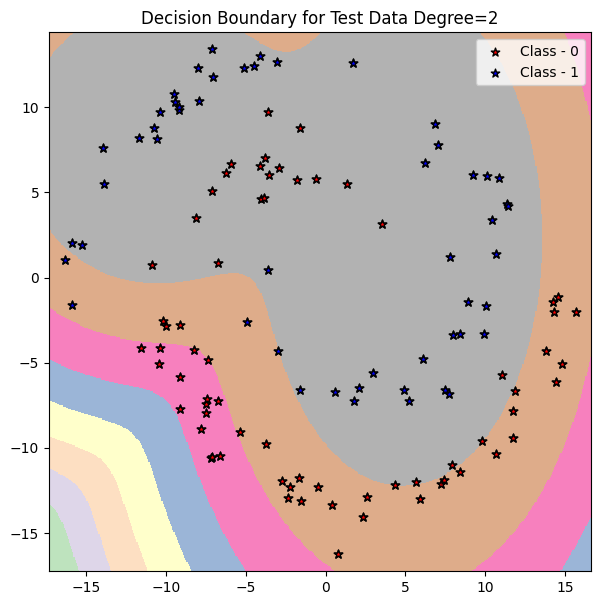

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

def build_and_train_model(num_components, class_x):
    # Train the SVM model
    model = GaussianMixture(n_components=num_components, covariance_type='diag', init_params='kmeans', random_state=0)

    model.fit(class_x)

    return model

# Function to evaluate the model and generate confusion matrix
def evaluate_model(model, X, y):
    # Predictions
    y_pred = model.predict(X)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)*100

    accuracy2 = accuracy_score(y, y_pred)

    return accuracy, accuracy2, y_pred

def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    cm = cm.T
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title, fontsize=16, weight='bold')
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    plt.show()

def plot_decision_boundary(x, y, models, num_components, title):
    N = 500
    # Create a meshgrid of points covering the feature space
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x1_range = np.linspace(x1_min, x1_max, N)
    x2_range = np.linspace(x2_min, x2_max, N)
    xx1, xx2 = np.meshgrid(x1_range, x2_range)

    # Plot decision boundaries
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    
    for class_label in classes:
        model = models[(num_components, class_label)]
        Z = model.score_samples(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap='Accent', alpha=0.5)
        # plt.contour(xx1, xx2, Z, cmap='copper')
        
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40)
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(title)
    plt.legend()
    plt.show()

def read_dataset_2(current_directory, folder_number):
    # classification_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_2_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Classification/Dataset 2/"
        + folder_number
        + "/"
    )

    classification_dataset_2_Train = (
        classification_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_2_Validation = (
        classification_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_2_Test = (
        classification_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y

def apply_GMM(train_x, train_y, val_x, val_y, test_x, test_y):

    models = {}
    results = {}
    num_components_per_class = [20]

    for num_components in num_components_per_class:
        train_y_pred = []
        val_y_pred = []
        test_y_pred = []
        for class_label in np.unique(train_y):
            class_x = train_x[train_y == class_label]
            model = build_and_train_model(num_components, class_x)
            models[(num_components, class_label)] = model

            train_probs = model.score_samples(train_x)
            val_probs = model.score_samples(val_x)
            test_probs = model.score_samples(test_x)

            train_y_pred.append(train_probs)
            val_y_pred.append(val_probs)
            test_y_pred.append(test_probs)

        train_y_pred = np.argmax(train_y_pred, axis=0)
        val_y_pred = np.argmax(val_y_pred, axis=0)
        test_y_pred = np.argmax(test_y_pred, axis=0)

        train_accuracy = accuracy_score(train_y, train_y_pred)*100
        val_accuracy = accuracy_score(val_y, val_y_pred)*100
        test_accuracy = accuracy_score(test_y, test_y_pred)*100

        # Store results
        results[num_components] = {
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy,
            'train_y_pred': train_y_pred,
            'val_y_pred': val_y_pred,
            'test_y_pred': test_y_pred
        }

    # Print the table of classification accuracies
    print("Classification Accuracies:")
    print("{:<10} {:<15} {:<15} {:<15}".format("Num Components", "Train Accuracy", "Validation Accuracy", "Test Accuracy"))
    for num_components, result in results.items():
        print("{:<10} {:<15.2f} {:<19.2f} {:<15.2f}".format(num_components, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))


    # Plot confusion matrices
    # for num_components in num_components_per_class:
    #     result = results[num_components]
    #     plot_confusion_matrix(train_y, result['train_y_pred'], result['train_accuracy'], title=f"Confusion Matric for Training Data Degree={num_components}")
    # for num_components in num_components_per_class:
    #     result = results[num_components]
    #     plot_confusion_matrix(val_y, result['val_y_pred'], result['val_accuracy'], title=f"Confusion Matric for Validation Data Degree={num_components}")
    # for num_components in num_components_per_class:
    #     result = results[num_components]
    #     plot_confusion_matrix(test_y, result['test_y_pred'], result['test_accuracy'], title=f"Confusion Matric for Test Data Degree={num_components}")

    # Plot decision boundary
    for num_components in num_components_per_class:
        plot_decision_boundary(train_x, train_y, models, num_components, title=f'Decision Boundary for Training Data Degree={num_components}')
    for num_components in num_components_per_class:
        plot_decision_boundary(val_x, val_y, models, num_components, title=f'Decision Boundary for Validation Data Degree={num_components}')
    for num_components in num_components_per_class:
        plot_decision_boundary(test_x, test_y, models, num_components, title=f'Decision Boundary for Test Data Degree={num_components}')


def main():
    folder_number = "9"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
        current_directory, folder_number
    )
    apply_GMM(train_x, train_y, val_x, val_y, test_x, test_y)

    

if __name__ == "__main__":
    main()
